# Exploratory data analysis

In [2]:
# Loading and data manipulation
import pandas as pd
from pandas.api.types import is_numeric_dtype

# Numerical computing
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap
import seaborn as sns

In [3]:
font = {
    'family': 'arial',
    'size': 13,
    'weight': 'bold'
}

plt.rc('font', **font)

In [4]:
import warnings

warnings.filterwarnings('ignore')

## Reading dataset

In [6]:
data = pd.read_csv('input/StudentPerformanceFactors.csv', 
                   engine='python')

In [7]:
print('\033[1m \bDimensions of data structure: \033[0m \n')
print(f'The dataset contains {data.shape[0]} observations and {data.shape[1]} features')

Dimensions of data structure:  

The dataset contains 6607 observations and 20 features


## Checking for missing values

In [9]:
print('\033[1m \bMissing values summary: \033[0m \n')
print(data.loc[:, data.isna().any()].isna().sum())

Missing values summary:  

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [10]:
# Data type check
print('\033[1m \bData types summary: \033[0m \n')
print(data.dtypes)

Data types summary:  

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


## Visualizing the distribution of exam score 

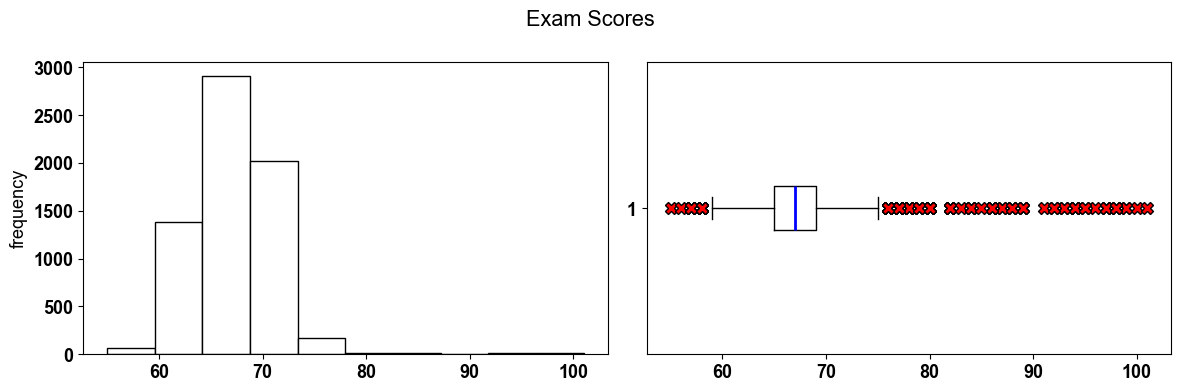

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axs[0].hist(data['Exam_Score'], color='w', edgecolor='k')
axs[0].set_ylabel('frequency')
axs[1].boxplot(data['Exam_Score'], vert=False, 
                      medianprops={'color': 'b', 'linewidth': 2}, 
                      flierprops={'markerfacecolor': 'r', 'marker': 'X', 'markersize': 8})

plt.suptitle('Exam Scores')
plt.tight_layout()
plt.show();

## Adding new feature based on examination score

In [14]:
# score = data['Exam_Score']
# data['Perf'] = np.where(score > score.median(), 'Low', 'High')

In [15]:
score = data['Exam_Score']
data['Perf'] = pd.cut(score, np.arange(score.min(), score.max(), 15), 
                      labels=['Low', 'Medium', 'High'])

In [16]:
print('\033[1m \bMissing values summary: \033[0m \n')
print(data.loc[:, data.isna().any()].isna().sum())

Missing values summary:  

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
Perf                         2
dtype: int64


In [17]:
data.loc[data['Perf'].isna(), 'Exam_Score']

1101     55
1525    101
Name: Exam_Score, dtype: int64

In [18]:
data.loc[(data['Perf'].isna()) & (score == score.min()), 'Perf'] = 'Low'
data.loc[(data['Perf'].isna()) & (score == score.max()), 'Perf'] = 'High'

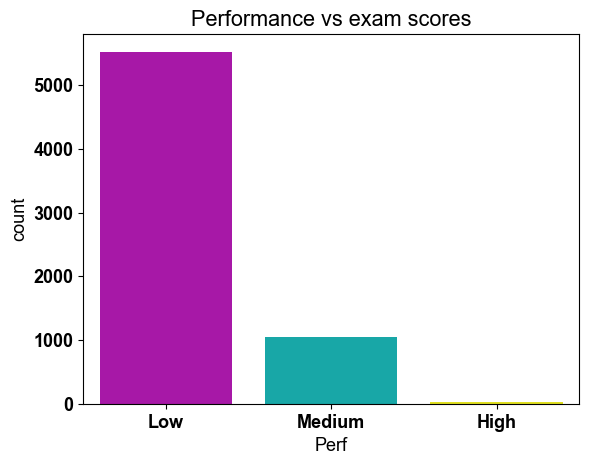

In [19]:
# Visualizing the distribution of the new feature
sns.countplot(x='Perf', data=data, palette=['m', 'c', 'yellow'])
plt.title('Performance vs exam scores')
plt.show();

## Distribution of significative numerical features

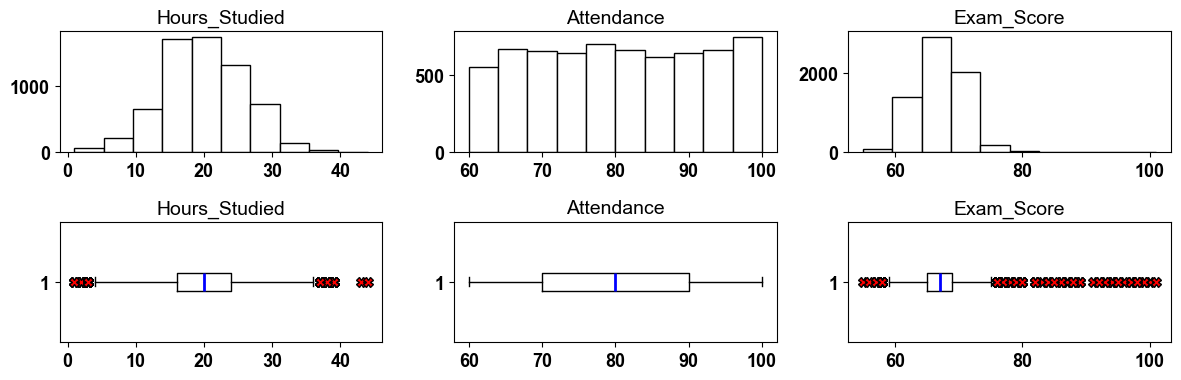

In [21]:
num_features = ['Hours_Studied', 'Attendance', 'Exam_Score']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 4))
for i, feature in enumerate(num_features):
    axs[0][i].hist(data[feature], bins=10, color='w', edgecolor='k')
    axs[0][i].set_title(feature, size=14)
    axs[1][i].boxplot(data[feature], vert=False, 
                      medianprops={'color': 'b', 'linewidth': 2}, 
                      flierprops={'markerfacecolor': 'r', 'marker': 'X', 'markersize': 7})
    axs[1][i].set_title(feature, size=14)

plt.tight_layout()
plt.show();

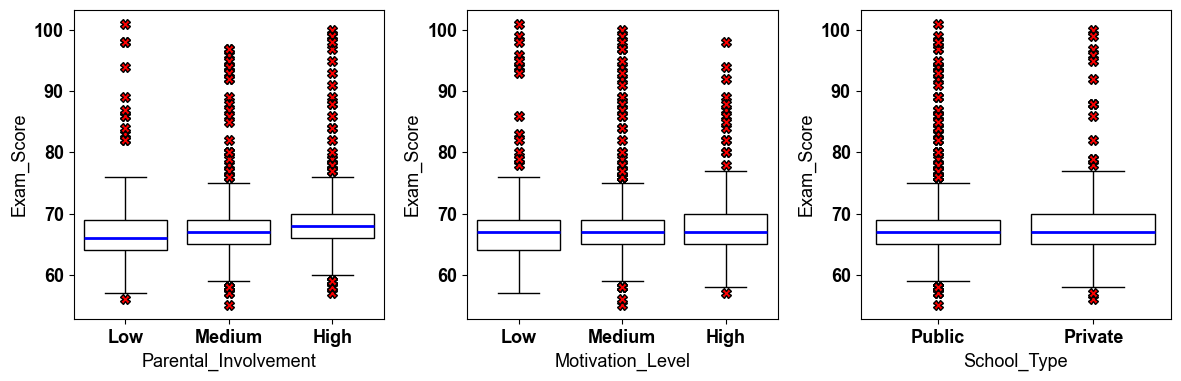

In [22]:
cat_features = ['Parental_Involvement', 'Motivation_Level', 'School_Type']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, feature in enumerate(cat_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=data, x=feature, y='Exam_Score', 
        color='white', linecolor='k', 
        medianprops={'color': 'b', 'linewidth': 2},
        flierprops={'markerfacecolor': 'r', 'marker': 'X', 'markersize': 7}
    )
    
plt.tight_layout()
plt.show();

## Pairplot to observe relationships between significative numerical variables

<Figure size 1200x400 with 0 Axes>

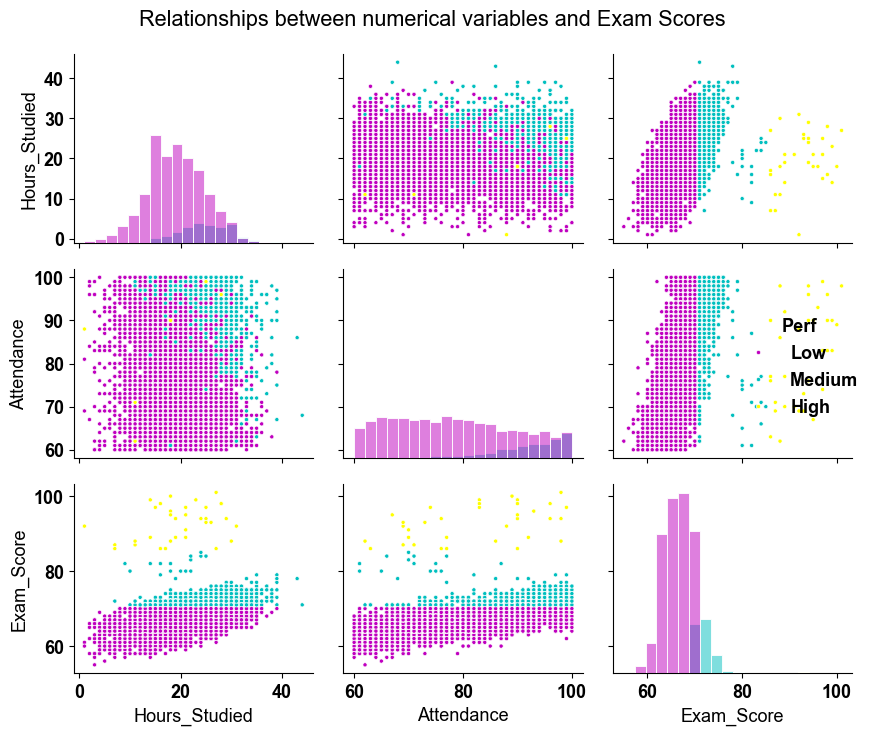

In [24]:
plt.figure(figsize=(12, 4))

sns.pairplot(data=data, vars=num_features, hue='Perf', palette=['m', 'c', 'yellow'], markers='.',
             diag_kind='hist', diag_kws={'alpha': .5, 'bins': 20, 'edgecolor': 'white'})
plt.suptitle('Relationships between numerical variables and Exam Scores')

plt.tight_layout()
plt.show();

## Cross-tabulation for categorical data

In [26]:
for y in ['Parental_Involvement', 'Motivation_Level']:
    crosstab = pd.crosstab(data['School_Type'], data[y])
    print(f'\033[1m \bCross-tabulation between School_Type and {y}: \033[0m \n')
    print(crosstab, '\n')

Cross-tabulation between School_Type and Parental_Involvement:  

Parental_Involvement  High  Low  Medium
School_Type                            
Private                589  380    1040
Public                1319  957    2322 

Cross-tabulation between School_Type and Motivation_Level:  

Motivation_Level  High   Low  Medium
School_Type                         
Private            387   604    1018
Public             932  1333    2333 



## Conclusions 

It depend on the analysis results and visualizations, such as which features are most related with exam scores, like parental involvement, motivation level, and study hours impact academic performance.

In [29]:
data = data[['Hours_Studied', 'Attendance', 'Parental_Involvement', 
             'Motivation_Level', 'Teacher_Quality', 'Exam_Score', 
             'Perf']] \
        .to_csv('input/StudentPerformanceFactors_filtered.csv', 
                index=False)